# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namsos
Processing Record 2 of Set 1 | lata
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | negapatam
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | dwarka
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | aykhal
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | tabou
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | qal'at bishah
City not found. Skipping...
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | kataragama
City not found. Skipping...
Processing Record 22 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namsos,64.4662,11.4957,21.03,72,20,4.12,NO,1723070731
1,lata,40.1629,-8.3327,13.61,97,1,0.75,PT,1723070733
2,port alfred,-33.5906,26.8910,16.81,47,4,4.44,ZA,1723070734
3,negapatam,10.7667,79.8333,26.88,81,100,3.61,IN,1723070735
4,bethel,41.3712,-73.4140,19.80,86,94,0.45,US,1723070736


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namsos,64.4662,11.4957,21.03,72,20,4.12,NO,1723070731
1,lata,40.1629,-8.3327,13.61,97,1,0.75,PT,1723070733
2,port alfred,-33.5906,26.8910,16.81,47,4,4.44,ZA,1723070734
3,negapatam,10.7667,79.8333,26.88,81,100,3.61,IN,1723070735
4,bethel,41.3712,-73.4140,19.80,86,94,0.45,US,1723070736


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

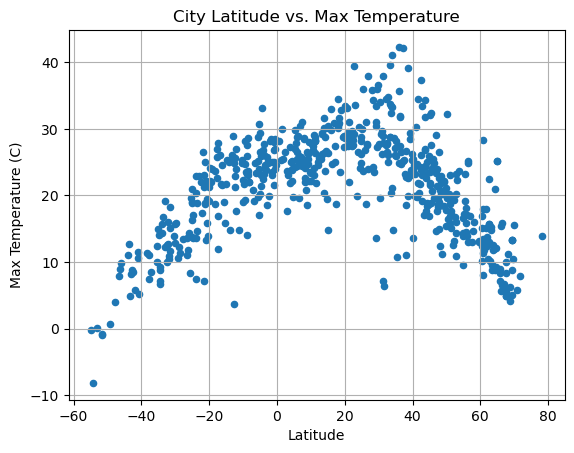

In [8]:
# Build scatter plot for latitude vs. temperature
lat_vs_temp = city_data_df[["Lat", "Max Temp"]]
lat_vs_temp.plot(kind="scatter", x = "Lat", y = "Max Temp")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

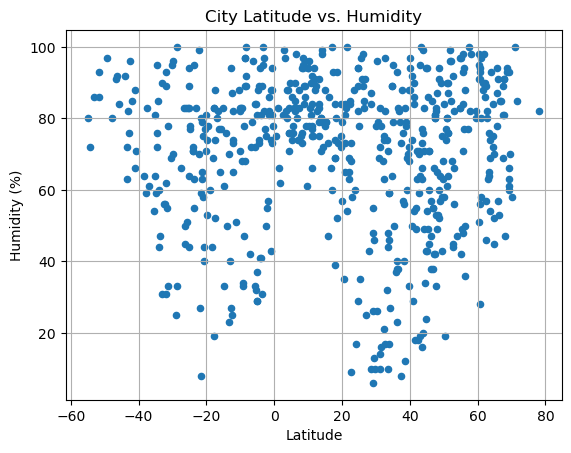

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_vs_humidity = city_data_df[["Lat", "Humidity"]]
lat_vs_humidity.plot(kind="scatter", x = "Lat", y = "Humidity")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

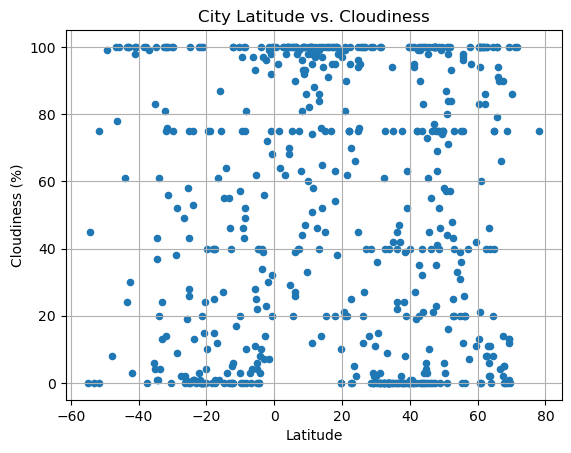

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_cloudiness = city_data_df[["Lat", "Cloudiness"]]
lat_vs_cloudiness.plot(kind="scatter", x = "Lat", y = "Cloudiness")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

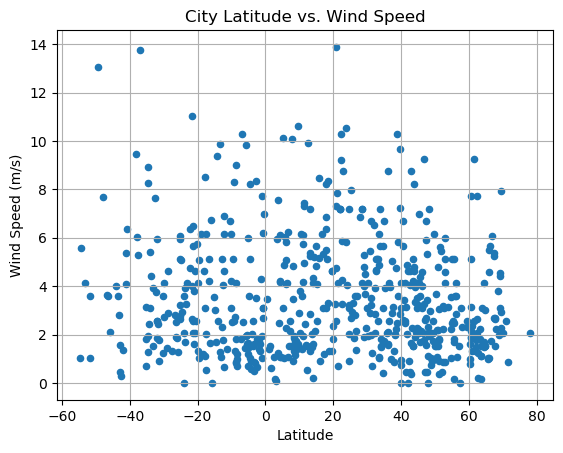

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_winds = city_data_df[["Lat", "Wind Speed"]]
lat_vs_winds.plot(kind="scatter", x = "Lat", y = "Wind Speed")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, line_loc, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_axis_label)
    plt.title(plot_title)
    print(f"The r^2-value is: {rvalue}")
    print(line_eq)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namsos,64.4662,11.4957,21.03,72,20,4.12,NO,1723070731
1,lata,40.1629,-8.3327,13.61,97,1,0.75,PT,1723070733
3,negapatam,10.7667,79.8333,26.88,81,100,3.61,IN,1723070735
4,bethel,41.3712,-73.4140,19.80,86,94,0.45,US,1723070736
5,tiksi,71.6872,128.8694,7.85,85,100,0.88,RU,1723070737


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port alfred,-33.5906,26.8910,16.81,47,4,4.44,ZA,1723070734
6,blackmans bay,-43.0167,147.3167,8.18,82,100,0.45,AU,1723070738
8,grytviken,-54.2811,-36.5092,-8.15,72,45,5.56,GS,1723070741
15,adamstown,-25.0660,-130.1015,18.99,64,28,2.76,PN,1723070748
16,invercargill,-46.4000,168.3500,8.90,92,78,3.58,NZ,1723070750


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.6266382504792302
y = -0.24x + 31.57


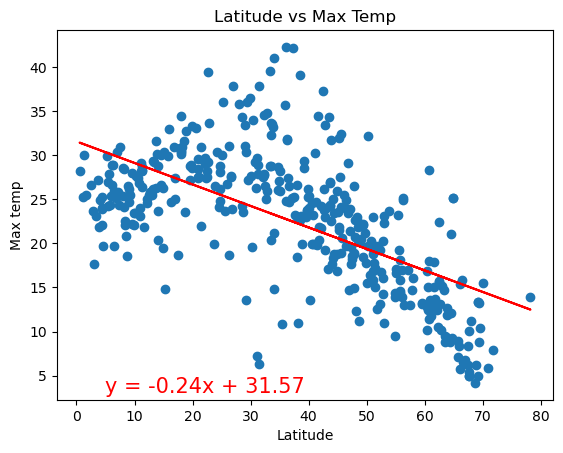

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_axis_label = "Max temp"
plot_title = "Latitude vs Max Temp"
line_loc = (5,3)

linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc)

The r^2-value is: 0.8372190381806919
y = 0.45x + 27.37


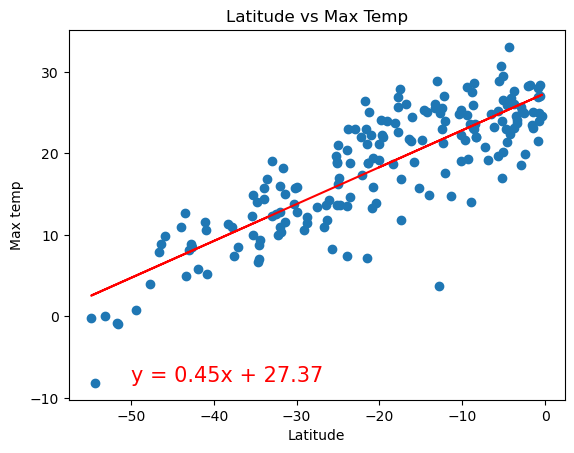

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_axis_label = "Max temp"
plot_title = "Latitude vs Max Temp"
line_loc = (-50,-8)

linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc)

**Discussion about the linear relationship:**  
In the Northern Hemisphere, there exists a moderate negative correlation between latitude and max temperatures. With increases in lattitude, max temperatures in celsius are likely to decrease by a multiple of 0.24 of latitude.  
In the Southern Hemisphere, there exists a strong positive correlation between latitude and max temperautres. With increases in latitude, max temperatures in celsius are very likely to increase by a multiple of 0.45 of latitude.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.0888694993461661
y = -0.1x + 74.16


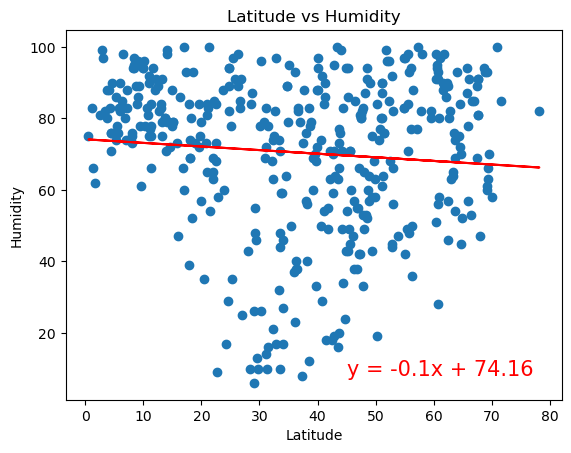

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_axis_label = "Humidity"
plot_title = "Latitude vs Humidity"
line_loc = (45,8)

linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc)

The r^2-value is: -0.076995818230907
y = -0.11x + 67.42


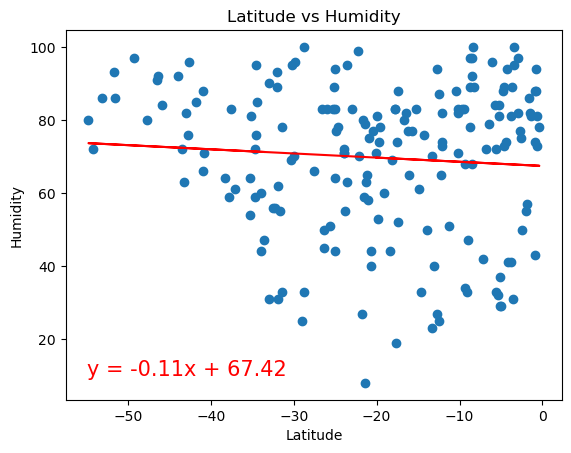

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_axis_label = "Humidity"
plot_title = "Latitude vs Humidity"
line_loc = (-55,10)

linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc)

**Discussion about the linear relationship:**  
As exemplified by the weak negative correlation coefficients in both northern and southern hemispheres, the relationship between latitude and humidity is very weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.2239116361457248
y = -0.46x + 70.37


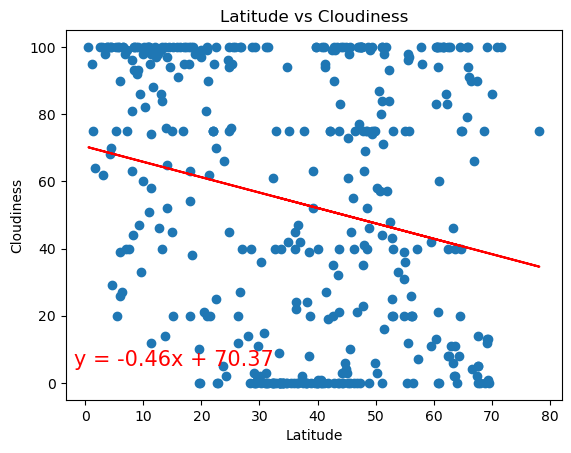

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_axis_label = "Cloudiness"
plot_title = "Latitude vs Cloudiness"
line_loc = (-2,5)

linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc)

The r^2-value is: -0.08980652062585746
y = -0.25x + 37.09


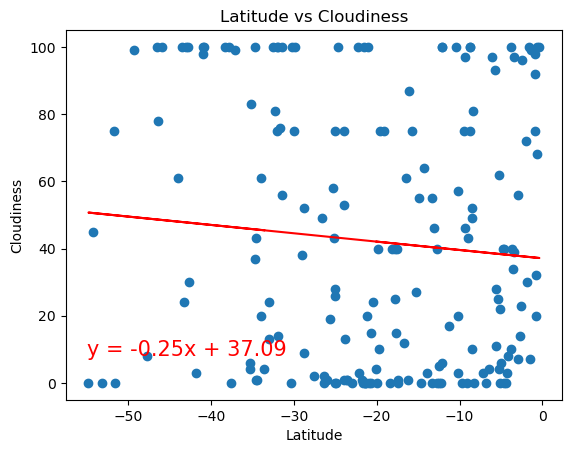

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_axis_label = "Cloudiness"
plot_title = "Latitude vs Cloudiness"
line_loc = (-55,8)

linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc)

**Discussion about the linear relationship:**  
Although the northern hemisphere has a stronger correlation then the southern hemisphere, as exemplified by the weak negative correlation coefficients in both northern and southern hemispheres, the relationship between latitude and cloudiness is weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.184911105034861
y = -0.02x + 4.24


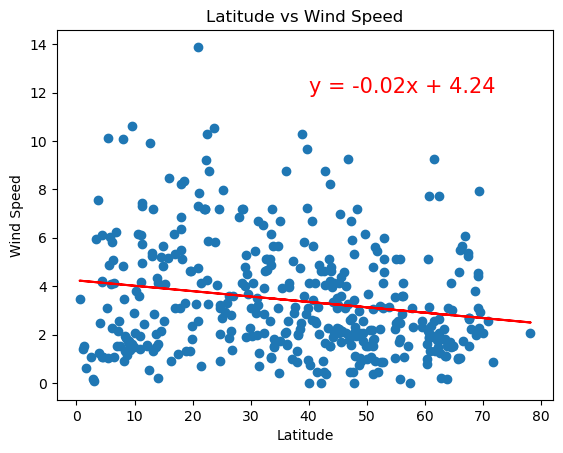

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_axis_label = "Wind Speed"
plot_title = "Latitude vs Wind Speed"
line_loc = (40,12)

linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc)

The r^2-value is: -0.119475191355826
y = -0.02x + 3.1


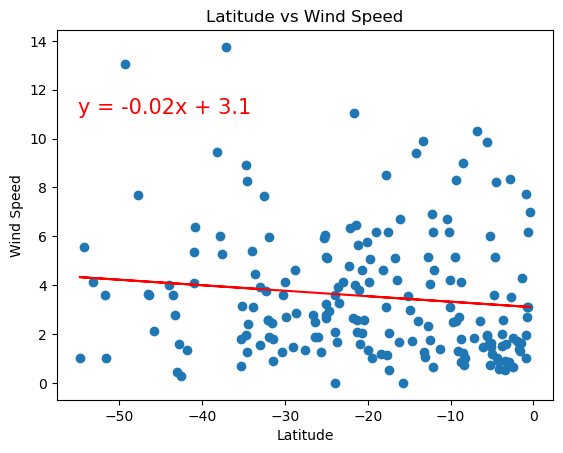

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_axis_label = "Wind Speed"
plot_title = "Latitude vs Wind Speed"
line_loc = (-55,11)

linregress_plot(x_values, y_values, y_axis_label, plot_title, line_loc)

**Discussion about the linear relationship:**  
As exemplified by the weak negative correlation coefficients in both northern and southern hemispheres, the relationship between latitude and wind speed is weak.